<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2023/blob/main/06/PTE_DL6_PICSIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Képek összehasonlítása, hasonló képek keresése

Importáljuk be a szükséges könyvtárakat

In [ ]:
from scipy.spatial import distance
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
import cv2

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
!wget https://github.com/karsarobert/Deep-Learning-2023/raw/main/pic.zip

--2023-10-10 18:34:59--  https://github.com/karsarobert/Deep-Learning-2023/raw/main/pic.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/karsarobert/Deep-Learning-2023/main/pic.zip [following]
--2023-10-10 18:34:59--  https://raw.githubusercontent.com/karsarobert/Deep-Learning-2023/main/pic.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 665851 (650K) [application/zip]
Saving to: ‘pic.zip’

pic.zip             100%[===================>] 650.25K  --.-KB/s    in 0.06s   

2023-10-10 18:34:59 (11.1 MB/s) - ‘pic.zip’ saved [665851/665851]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("pic.zip")
zip_ref.extractall()
zip_ref.close()

Az InceptionV3 és a EfficientNetB0 modellt használjuk a tulajdonságok kinyeréséhez

In [ ]:
Inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True, pooling='avg', input_shape=(299, 299, 3))

96112376/96112376 [==============================] - 1s 0us/step


In [ ]:
Efficient = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=True, pooling='avg', input_shape=(224, 224, 3))

21834768/21834768 [==============================] - 0s 0us/step


In [ ]:
Inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

In [ ]:
Efficient.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

A hálózat utolsó kimenetét használjuk fel mint tulajdonság vektort 2048 dimenziós!

In [ ]:
basemodel = Model(inputs=Inception.input, outputs=Inception.get_layer('avg_pool').output)

In [ ]:
basemodel_eff = Model(inputs=Efficient.input, outputs=Efficient.get_layer('avg_pool').output)

In [ ]:
def get_feature_vector(img):
 img1 = cv2.resize(img, (299, 299))
 feature_vector = basemodel.predict(img1.reshape(1, 299, 299, 3))
 return feature_vector[0,:]

In [ ]:
def get_feature_vector_eff(img):
 img1 = cv2.resize(img, (224, 224))
 feature_vector = basemodel_eff.predict(img1.reshape(1, 224, 224, 3))
 return feature_vector[0,:]

In [ ]:
def calculate_similarity(vector1, vector2):
    return 1 - distance.cosine(vector1, vector2)

In [ ]:
img1 = mpimg.imread('KM1.jpg')
img2 = mpimg.imread('KM3.jpg')
img3 = mpimg.imread('Ákos2.jpg')
img=[img1,img2,img3]

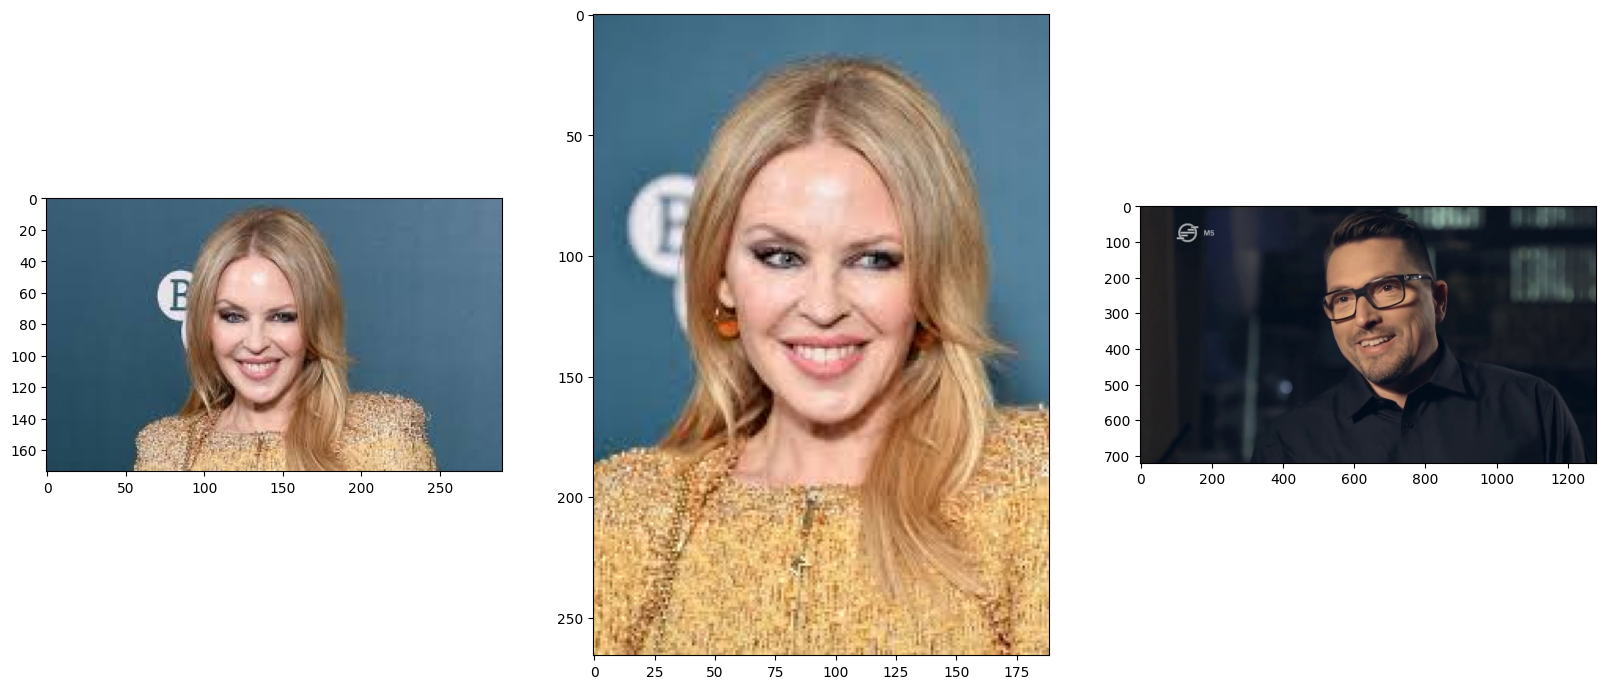

In [ ]:
fig = plt.figure(figsize=(20, 20))
columns = 3
rows = 1
for i in range(1,4):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[i-1])
plt.show()

In [ ]:
f1 = get_feature_vector(img1)
f2 = get_feature_vector(img2)
f3 = get_feature_vector(img3)

print(calculate_similarity(f1, f2))
print(calculate_similarity(f1, f3))

1/1 [==============================] - 0s 159ms/step
0.9419192671775818
0.8425580263137817


In [ ]:
f1.shape

(2048,)

In [ ]:
f1 = get_feature_vector_eff(img1)
f2 = get_feature_vector_eff(img2)
f3 = get_feature_vector_eff(img3)

print(calculate_similarity(f1, f2))
print(calculate_similarity(f1, f3))

1/1 [==============================] - 0s 54ms/step
0.8603399991989136
0.2999913990497589


In [ ]:
img1 = mpimg.imread('pizza1.jpg')
img2 = mpimg.imread('pizza2.jpg')
img3 = mpimg.imread('KM1.jpg')
img=[img1,img2,img3]

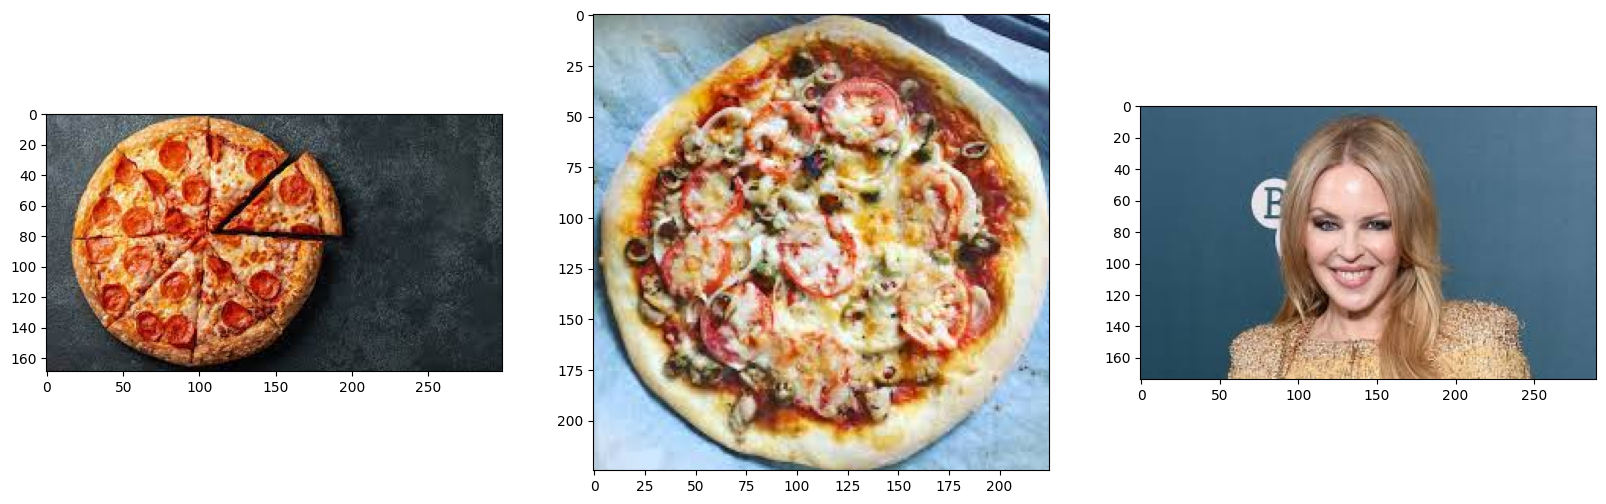

In [ ]:
fig = plt.figure(figsize=(20, 20))
columns = 3
rows = 1
for i in range(1,4):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[i-1])
plt.show()

In [ ]:
f1 = get_feature_vector(img1)
f2 = get_feature_vector(img2)
f3 = get_feature_vector(img3)

print(calculate_similarity(f1, f2))
print(calculate_similarity(f2, f3))

1/1 [==============================] - 0s 227ms/step
0.8220463991165161
0.8149333596229553


In [ ]:
f1 = get_feature_vector_eff(img1)
f2 = get_feature_vector_eff(img2)
f3 = get_feature_vector_eff(img3)

print(calculate_similarity(f1, f2))
print(calculate_similarity(f2, f3))

1/1 [==============================] - 0s 53ms/step
0.39392608404159546
0.049903497099876404


In [ ]:
f1

array([-0.03216838, -0.12595141, -0.16987433, ...,  0.3707147 ,
        0.10862004, -0.11491861], dtype=float32)